# 대한민국 지역별 온실가스 배출량, 에너지 소비량 분석하기
---
### 작성자: 18학번 배정훈 (rhenus9911@gmail.com)
---

현재 대한민국은 환경 빅데이터 플랫폼(https://www.bigdata-environment.kr/user/main.do)을 도입하여, 전국 환경 이슈, 각 지역별 환경 이슈, 환경 카테고리별 데이터에 대한 정보를 제공하고 있다. 데이터는 이산적인 데이터이며 각 데이터는 (2016~2020) 5년간 각 업종별 온실가스 배출량과 에너지 소비량이 제공되고 있다.

데이터 중에서 
row Data를 분석하여 지역별 온실가스 배출량과 에너지 소비량의 분포도과 각 업종별 온실가스 배출량과 에너지 소비량을 분석 할 수 있다.
Column Data를 분석하여 (2016~2020)의 데이터의 흐름에 따라 각 지역별로 온실가스 배출량과 에너지 소비량에 대한 대안방안을 예상할 수 있다.

학습한 이산수학의 이론을 데이터에 적용하여, 우리는 환경에 관한 문제를 해소하기 위한 아이디어를 고찰하며 이를 실현화하기 위한 프로토타입(prototype)을 구현해본다. 

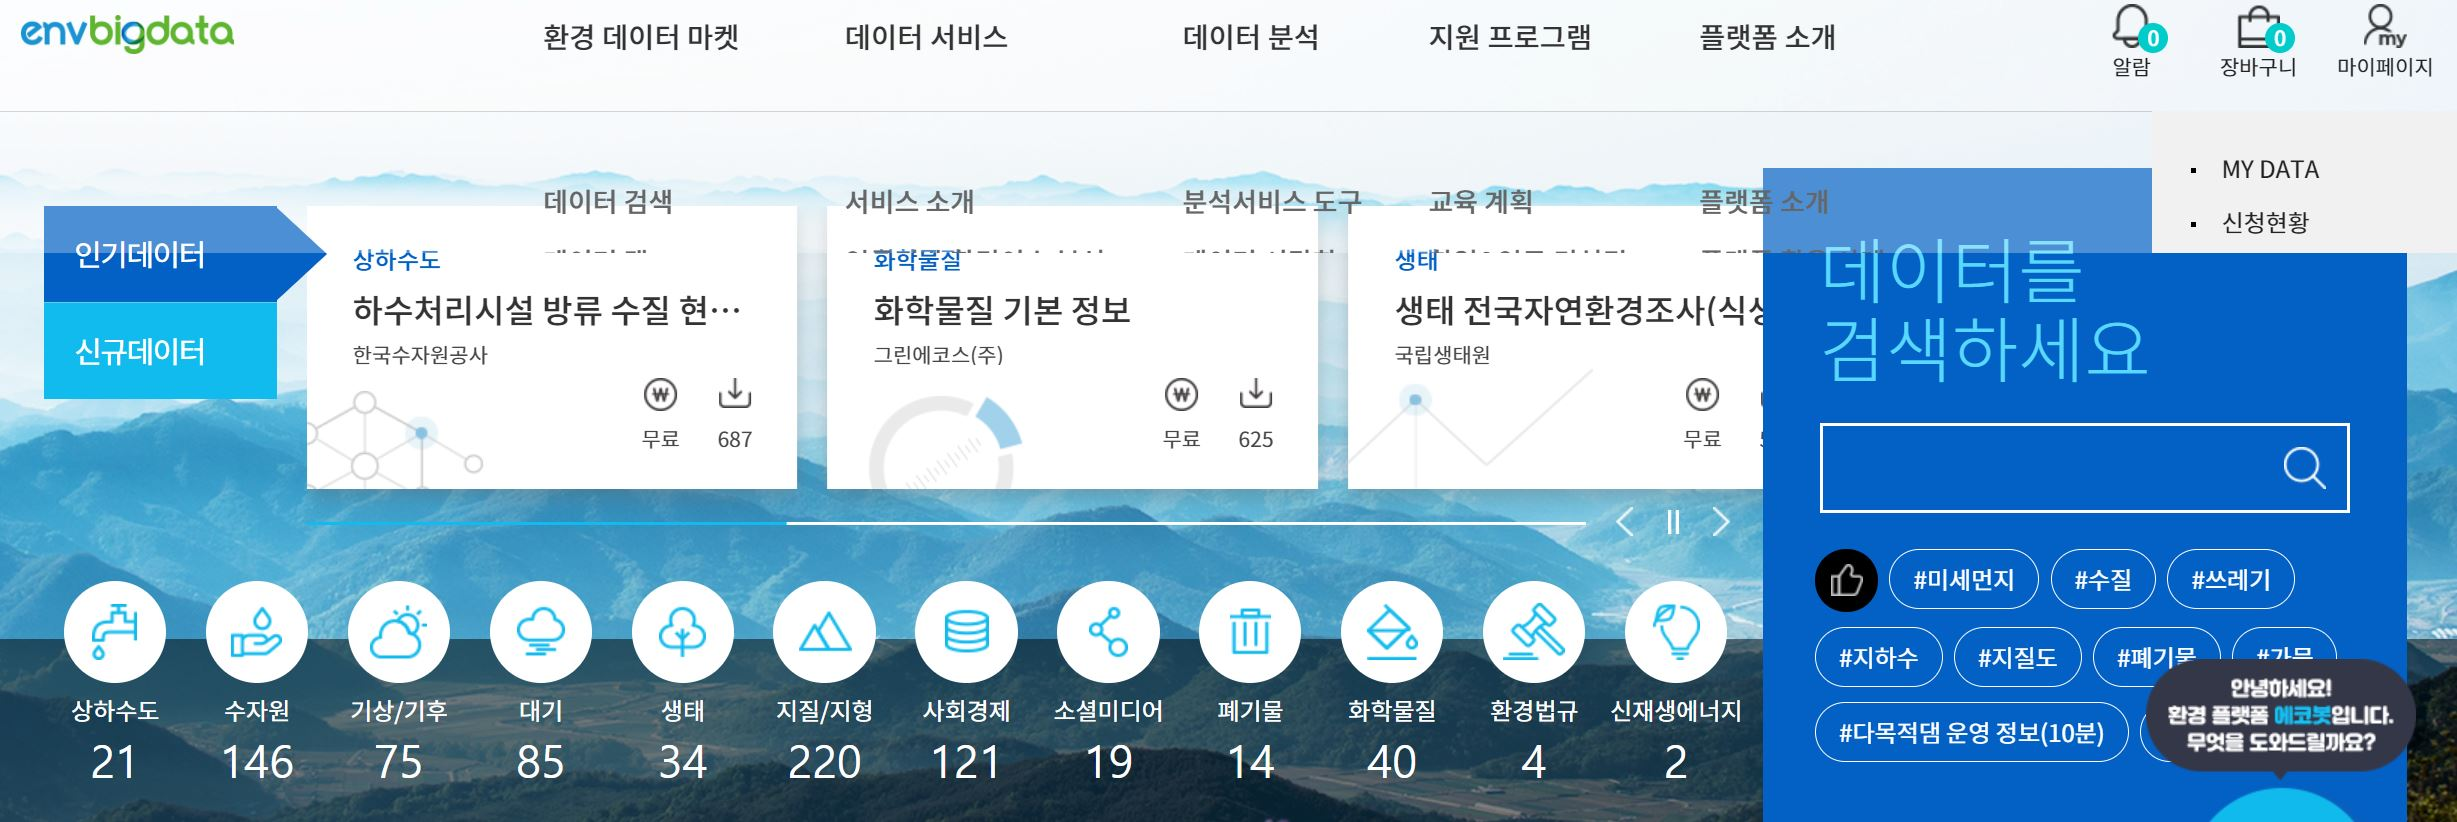
> 들여쓴 블록

## 필수확인 사항: 
아래 링크에서 "지역별 온실가스 및 에너지 소비량.csv" 파일을 다운로드 받으시기 바랍니다.
https://drive.google.com/file/d/1doyUVlT9pKUwqEtXS8OnLOAObTvBuStn/view?usp=sharing

파일을 올리는 방법은 다운로드한 파일을 왼쪽 탭의 폴더 아이콘을 클릭한 뒤, 파일을 해당 장소에 드래그앤 하거나 업로드 아이콘을 클릭하여 업로드 하시면 됩니다



# HW 1. 판다스(pandas) 데이터 프레임(Dataframe) 다루기
본 과제는 판다스의 데이터프레임을 조작하는데 목표를 둡니다. csv, json 파일 읽기, 필요 데이터 추출 및 필터, 그룹화 및 통계 계산하기를 학습할 예정입니다.

`각 과제 아래 세부 과제들로 구성됩니다`

다음은 pandas 라이브러리를 로드합니다.

In [83]:
import pandas as pd

전국 환경오염 데이터를 로드하고, 데이터프레임 타입을 갖는 변수 __df__를 출력합니다.
데이터 프레임은 2차원, 동적크기확장이 가능하며, 다양한 데이터타입을 수용할 수 있습니다.
```
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
```

In [84]:
#CP949는 한글로 인한 텍스트 인코딩을 위한 옵션입니다.
df = pd.read_csv('dataset\지역별 온실가스 및 에너지 소비량.csv', encoding='utf-8')

데이터의 컬럼명에 대한 안내

*   AREA: 지역
*   DSGN_INDS: 업종
*   GHG_EMS_XXXX: XXXX년도 온실가스 배출량. 예) GHG_EMS_2020: 2020년도 온실가스 배출량
*   ENG_CNSM_XXXX: XXXX년도 에너지 소비량. 예) ENG_CNSM_2020: 2020년도 에너지 소비량


df.head(10) 명령어를 호출하여 상위 10개의 데이터를 불러옵니다

In [85]:
df.head(10)

,NO,AREA,DSGN_INDS,GHG_EMS_2016,ENG_CNSM_2016,GHG_EMS_2017,ENG_CNSM_2017,GHG_EMS_2018,ENG_CNSM_2018,GHG_EMS_2019,ENG_CNSM_2019,GHG_EMS_2020,ENG_CNSM_2020
0,1,강원도,건물,"32,321",640.7,"34,153",685,"29,185",585.7,"30,621",615.4,"23,649",472.7
1,2,강원도,광업,"188,294",514.3,"172,004",501.8,"206,624",622.5,"157,739",593.2,"35,191",628
2,4,강원도,발전에너지,"3,838,862","39,793.80","4,025,829","45,554.00","4,221,901","52,148.00","3,614,961","44,806.00","3,072,716","38,085.00"
3,6,강원도,시멘트,"827,522","4,487.60","1,898,766","10,045.00","1,453,305","7,944.00","1,417,415","7,742.00","95,497",576
4,8,강원도,제조업,"21,430",330.1,"21,467",342.7,"21,682",437.7,"19,514",394,"20,501",413
5,10,강원도,철강,"92,837","1,251.00","112,608","1,464.00","136,396","1,764.00","131,344","1,723.00","126,090","1,671.00"
6,11,강원도,통신,"39,357",810,"49,539","1,019.00","64,906","1,336.00","71,534","1,472.00","78,830","1,619.20"
7,12,강원도,폐기물,"111,170",355.8,"110,221",360,"105,394",402.3,"46,327",353,"61,092",432
8,13,경기도,건물,"20,753",422.5,"20,525",418,"24,098",498.5,"21,981",452.4,"19,263",398
9,14,경기도,교통,"52,684",900.4,"52,031",839.5,"44,939",733,"41,704",680.3,"31,849",531.6


## ■ 문제 1-1 데이터 프레임의 레코드 수를 출력할 것
데이터 프레임의 레코드 수(Row의 수)와 필드 수(Column)를 각각 출력하여라
```
데이터프레임의 __shape__ 메소드는 데이터의 차원을 표현합니다

참조: https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.DataFrame.shape.html`
```

In [86]:
# 2차원 행렬로 구성된 데이터 프레임의 크기 출력, 예 ( number_of_rows, number_of_columns )
## your code here..

(236, 13)

In [87]:
# 행 데이터의 수만 가져오기

In [88]:
# 열 데이터의 수만 가져오기

## ■ 문제 1-2. 데이터프레임의 표현적인 통계(descriptive statistics) 보기
주어진 데이터프레임의 표현적인 통계를 출력하시오

```
Descriptive statistics이란? 데이터의 분포의 모양, 퍼짐 정도, 중앙에 몰리는 정도. 최대, 최소값, 평균 을 한눈에 보여주도록 합니다.

참조 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
```


In [89]:
# 데이터프레임에 대한 표현적인 통계를 출력하시오
## your code here..

## ■ 문제 1-3 데이터프레임의 특정 컬럼(column) 및 레코드(records)  출력
 강원도의 (지역, 업종, 2016년도 온실가스 배출량, 2020년 에너지 소비량) 만 추출하여라.


```
df.loc는 라벨의 이름을 이용하여 index를 선택 가능하다.

특정 column의 값 가져오기
- df.loc [ : , [ 'column1' , 'column2'] ]

특정 index까지의 column값 가져오기
- df.loc [ 'index1' : 'index2' , [ 'column1' , 'column2' ] ]

조건을 이용하여 특정 값 가져오기
- df.loc [ df['index']>0 , [ 'column1', 'column2' ] ]

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
```

In [90]:
#1-3 답안

## ■ 문제 1-4 데이터프레임의 그룹함수 적용하기(최대, 최소, 평균 등)
1) 각 지역별로 2020년 온실가스 배출 평균량을 구하시오
2) 각 지역별로 2016년 에너지 소비량의 최대값을 구하시오
3) 각 지역별로 2020년 에너지 소비량의 최소값을 구하시오

```
DataFrame을 데이터 그룹화 시키기 함수: groupby()
- Series의 데이터 그룹화 : 특정열 인덱싱.groupby(기준열 인덱싱)
- DataFrame의 데이터 그룹화 : df.groupby("기준이 될 컬럼명")를 통해 특정열이 아닌, df의 모든 열에 대해 계산
ex) grouped = df['index'].groupby(df['key']) = df['index']를 df['key']기준으로 데이터 그룹화시키고 그 결과를 grouped에 저장 
추가적으로, grouped.mean()을 적용하여 그룹된 값의 평균을 구할 수 있다.
```



In [91]:
# 각 지역별로 2020년 온실가스 배출 평균량을 구하시오
## your code here..

In [92]:
# 각 지역별로 2016년 에너지 소비량의 최대값을 구하시오
## your code here..

In [93]:
# 각 지역별로 2020년 에너지 소비량의 최소값을 구하시오
## your code here..

## ■ 문제 1-5 데이터프레임의 특정 열에 함수 적용하기
현재 온실가스 배출량과 에너지 소비량은 숫자가 아닌 string(object 타입으로 정의되어있다. df.info()를 통해 이를 확인할 수 있다. 숫자형으로 변환하기 위해서 우선, 1000단위마다 추가된 ,(comma)를 제거해야한다. GHG_EMS_2016과 ENG_CNSM_2020의 데이터에 ,를 제거하여라.

```
특정 열에 값들에 대해 ,를 제거하는 방법
astype(str)은 해당 데이터를 string형태로 변환하기 위해 사용함.
df['column_name'] = df['column_name'].astype(str).apply(lambda x: x.str.replace(',', ''))
```

In [94]:
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   NO             236 non-null    int64 
 1   AREA           236 non-null    object
 2   DSGN_INDS      236 non-null    object
 3   GHG_EMS_2016   236 non-null    object
 4   ENG_CNSM_2016  236 non-null    object
 5   GHG_EMS_2017   236 non-null    object
 6   ENG_CNSM_2017  236 non-null    object
 7   GHG_EMS_2018   236 non-null    object
 8   ENG_CNSM_2018  236 non-null    object
 9   GHG_EMS_2019   236 non-null    object
 10  ENG_CNSM_2019  236 non-null    object
 11  GHG_EMS_2020   236 non-null    object
 12  ENG_CNSM_2020  236 non-null    object
dtypes: int64(1), object(12)
memory usage: 24.1+ KB


In [95]:
## your code here..

## ■ 문제 1-6 데이터프레임의 스키마 및 구조를 확인/변경하기
df.info()를 통해 데이터 타입이 어떠한지 확인하고 모든 년도의 온실가스 배출량과 에너지 소비량을 int로 변환하여라. 만약 필요하다면, 해당 값의 오류(, 와 같은) 등을 해결한뒤 int형으로 변환하시오.

```
df['column_name'].astype(float)
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
```

In [96]:
# 주어진 데이터프레임의 데이터타입 확인
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   NO             236 non-null    int64 
 1   AREA           236 non-null    object
 2   DSGN_INDS      236 non-null    object
 3   GHG_EMS_2016   236 non-null    object
 4   ENG_CNSM_2016  236 non-null    object
 5   GHG_EMS_2017   236 non-null    object
 6   ENG_CNSM_2017  236 non-null    object
 7   GHG_EMS_2018   236 non-null    object
 8   ENG_CNSM_2018  236 non-null    object
 9   GHG_EMS_2019   236 non-null    object
 10  ENG_CNSM_2019  236 non-null    object
 11  GHG_EMS_2020   236 non-null    object
 12  ENG_CNSM_2020  236 non-null    object
dtypes: int64(1), object(12)
memory usage: 24.1+ KB


In [97]:
# 모든 년도의 온실가스 배출량과 에너지 소비량을 float형 타입으로 변환해라
df['ENG_CNSM_2020'] = df['ENG_CNSM_2020'].astype(float)

In [98]:
# 변경된 데이터 구조 스키마 확인
df.dtypes

NO                 int64
AREA              object
DSGN_INDS         object
GHG_EMS_2016      object
ENG_CNSM_2016     object
GHG_EMS_2017      object
ENG_CNSM_2017     object
GHG_EMS_2018      object
ENG_CNSM_2018     object
GHG_EMS_2019      object
ENG_CNSM_2019     object
GHG_EMS_2020      object
ENG_CNSM_2020    float64
dtype: object

## ■ 문제 1-7 데이터프레임의 특정 값을 필터링 하기
df 데이터프레임으로부터 '경기도' 지역 2020년 온실가스 배출량과 소비량을 구하시오


```
특정 컬럼값을 만족하는 데이터프레임을 출력하기
df.loc[df['column_name'] == some_value]
```

In [99]:
# 1-7 답안

## ■ 문제 1-8 실제 데이터값에 기반한 서브데이터 추출(Boolean indexing)
두 가지 이상의 필터를 혼합하여 2016년 온실가스 배출량이  200이상이고 2020년 에너지 소비량이 3000이상인 데이터만 추출하시오. 

```
cond_A = (df['column_name'] > 1000)
cond_B = (df['column_name'] > 2000)
df_sub = df.loc [cond_A & cond_B]
```

In [100]:
# 1-8 답안

# HW2. 논리식(Logic expression)에 대한 라이브러리 사용 및 Matplotlib를 사용한 데이터 시각화

pyprover는 first-order predicate logic에 대한 증명을 파이썬 라이브러리 입니다. 슬라이드 33페이지에 있는 추론에 대해서 설명합니다.
Matplotlib은 주로 2D 그래프 차트를 위한 패키지로, 출판물 수준의 그래프를 만들어내도록 지원합니다. pdf, svg, jpg 등의 벡터 및 레스터 포맷으로 출력이 가능합니다

pyprover 라이브러리 설치하기

In [101]:
!pip install pyprover

pyprover 임포트 하기

In [102]:
from pyprover import *

추론법칙에 대해서 알아봅니다. 2장 수학적 모델과 논리 슬라이드 33-34페이지에 대한 실습입니다

simplication 단순화
(P ^ Q) → P

In [103]:
given = (P&Q)
conclu = P
print("true") if proves( given, conclu ) else print("false")

true


후건 부정(부정 논법) modus tollen

In [104]:
given = (~Q&(P>>Q))
conclu = ~P
print("true") if proves( given, conclu ) else print("false")

true



구성적 양도 논법 constructive dilemma

In [105]:
# proves( given, conclusion )
given = ((P>>Q)&(R>>S)&(P|R))
conclu = Q|S
print("true") if proves( given, conclu ) else print("false")

true


파괴적 양도 논법 destructive dilemma

## ■ 문제 2-1. 전건 긍정 modus ponens

In [106]:
## your code here

## ■ 문제 2-2. 가언 삼단 논법 hypothetical syllogism

In [107]:
## your code here

## ■ 문제 2-3. 술어 논리 predicate logic

TE는 Exist(∃x)를 의미하고 FA는 ForAll(∀x)를 의미하는 한정자이다. 이 한정자를 predicate logic(술어 로직)와 함께 사용하는 예제를 살펴보자. (본 예제는 실행하기만 하면 됩니다)
```
Statement: Not all students like homework
Negation: There is at leat one student who does not like homework
```

In [108]:
# x: students, P: isHomeworkLikable(x)
given = ~(FA(x, P(x))) # Not all students like homework
conclu = TE(x, ~P(x)) # There is at least one student who does not like homework
print("true") if proves( given, conclu ) else print("false")

true


Matplotlib 를 사용하기
Matplotlib는 그래프 차트등을 표현하는 저수준 라이브러리이다. 좀더 진보된 라이브러리를 원한다면, seaborn 등을 참고하면 좋다.

In [109]:
# matplotlib이 없는 경우, 주석을 지우고 실행
# !pip install -U matplotlib

In [110]:
#matplotlib 임포트하기.
import matplotlib.pyplot as plt
import numpy as np

Colab에서 한글이 제대로 나오지 않는 경우는 다음 코드를 수행하시 바랍니다(주석 해제후)

In [111]:
plt.rc('font', family='NanumBarunGothic')
#
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

인덱스 설정

In [112]:
df_busan = df[df['AREA'].str.contains('부산')]
df_busan

,NO,AREA,DSGN_INDS,GHG_EMS_2016,ENG_CNSM_2016,GHG_EMS_2017,ENG_CNSM_2017,GHG_EMS_2018,ENG_CNSM_2018,GHG_EMS_2019,ENG_CNSM_2019,GHG_EMS_2020,ENG_CNSM_2020
99,123,부산광역시,건물,"20,821",424.5,"19,316",393.5,"18,903",385.5,"18,686",381.3,"17,174",350.7
100,124,부산광역시,교통,"60,886","1,117.30","43,234",746.6,"47,841",830.9,"44,390",764,"41,382",724.3
101,125,부산광역시,기계,"62,790","1,240.00","89,715","1,694.30","7,400","1,399.00","67,578","1,261.00","28,686",557.8
102,126,부산광역시,발전에너지,"22,355,865","245,194.00","36,512,472",454.6,"40,399,651","507,736.00","36,670,122","451,102.00","33,284,887",400785.0
103,127,부산광역시,산업단지,"193,804","2,768.00","187,627","2,690.00","106,001","1,593.00","96,762","1,469.00","129,743",2398.6
104,128,부산광역시,석유화학,"21,880",433.8,"22,213",364.2,"18,425",411,"14,099",388.5,"17,944",453.5
105,129,부산광역시,섬유,"22,746",560,"20,927",534,"20,182",483,"22,521",457,"15,876",369.0
106,132,부산광역시,자동차,"74,776","1,443.50","61,076","1,202.00","55,611","1,106.00","50,061",999,"18,812",385.0
107,134,부산광역시,조선,"17,260",288.2,"15,992",281,"14,817",274,"12,398",226,"10,754",208.0
108,135,부산광역시,집단에너지,"58,409","1,159.00","63,680","1,262.00","69,350","1,376.00","65,040","1,290.00","31,252",616.0


In [113]:
df_busan = df_busan.set_index('DSGN_INDS')
df_busan

,NO,AREA,GHG_EMS_2016,ENG_CNSM_2016,GHG_EMS_2017,ENG_CNSM_2017,GHG_EMS_2018,ENG_CNSM_2018,GHG_EMS_2019,ENG_CNSM_2019,GHG_EMS_2020,ENG_CNSM_2020
DSGN_INDS,,,,,,,,,,,,
건물,123,부산광역시,"20,821",424.5,"19,316",393.5,"18,903",385.5,"18,686",381.3,"17,174",350.7
교통,124,부산광역시,"60,886","1,117.30","43,234",746.6,"47,841",830.9,"44,390",764,"41,382",724.3
기계,125,부산광역시,"62,790","1,240.00","89,715","1,694.30","7,400","1,399.00","67,578","1,261.00","28,686",557.8
발전에너지,126,부산광역시,"22,355,865","245,194.00","36,512,472",454.6,"40,399,651","507,736.00","36,670,122","451,102.00","33,284,887",400785.0
산업단지,127,부산광역시,"193,804","2,768.00","187,627","2,690.00","106,001","1,593.00","96,762","1,469.00","129,743",2398.6
석유화학,128,부산광역시,"21,880",433.8,"22,213",364.2,"18,425",411,"14,099",388.5,"17,944",453.5
섬유,129,부산광역시,"22,746",560,"20,927",534,"20,182",483,"22,521",457,"15,876",369.0
자동차,132,부산광역시,"74,776","1,443.50","61,076","1,202.00","55,611","1,106.00","50,061",999,"18,812",385.0
조선,134,부산광역시,"17,260",288.2,"15,992",281,"14,817",274,"12,398",226,"10,754",208.0


기본적인 데이터프레임의 시각화는 plot() 명령어를 사용하여 쉽게 변경할 수 있다.
df.plot(figsize=(12,12))
그림 크기가 12x12 크기인 그래프차트를 생성한다.

<AxesSubplot:xlabel='DSGN_INDS'>

C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytic

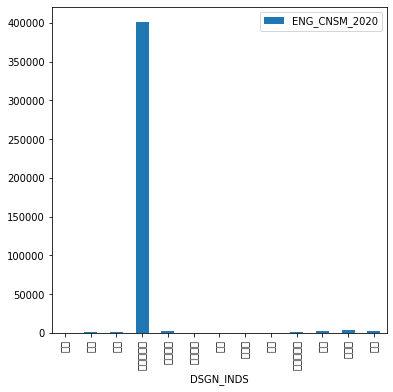

In [114]:
df_busan.plot(kind='bar', figsize=(6,6), y='ENG_CNSM_2020')

우리는 자주 데이터내 특징에 대해서 여러 개의 그래프 차트를 그릴 필요가 있다. 다음 예제는 여러개의 서브플롯(subplot)을 만들어서 여러개의 차트를 구축하는 방법에 대해 배워본다.

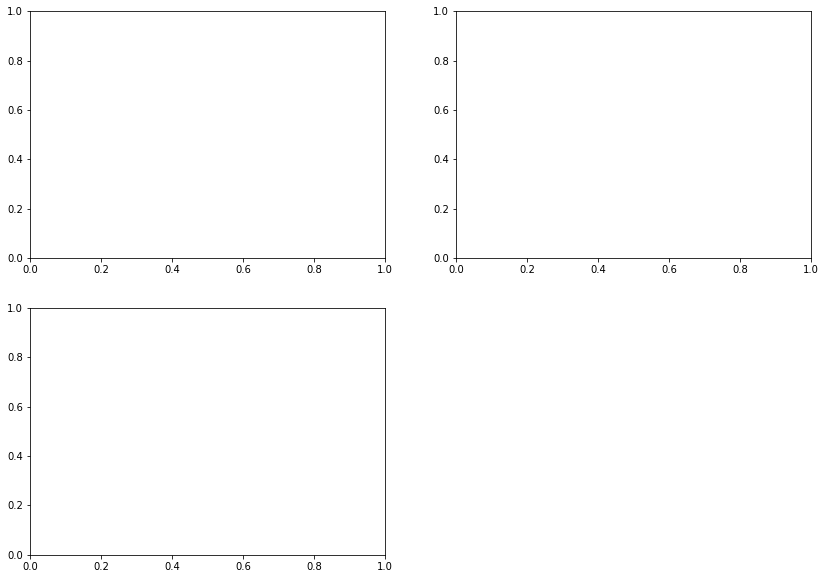

In [115]:
fig= plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

예를 들면 다음과 같이 3번째 그래프 차트에 x,y 값을 추가할 수 있다.
```
https://matplotlib.org/
```

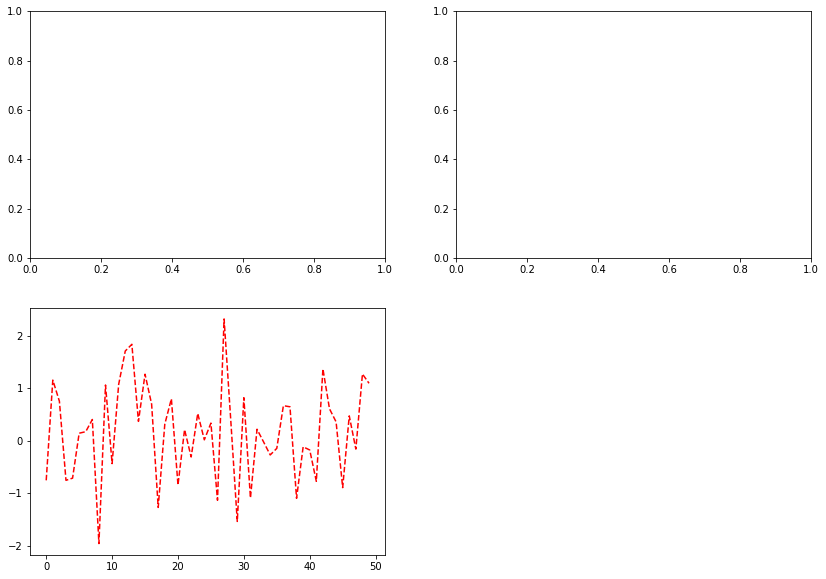

In [116]:
## 예를 들면
x = np.arange(50)
y = np.random.randn(50)
ax3.plot(x, y, 'r--')
fig

## ■ 문제 2-4 부산지역 환경오염정보에 대한 그래프 출력
부산지역(df_busan) 연도별로 온실가스 배출량과 배기가스 배출량에 따른 막대 그래프를 ax1에 그리고자 한다. x축은 업좋이며, y축은 2020년 에너지소비량 에 대응되는 그래프를 완성하시오

C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytic

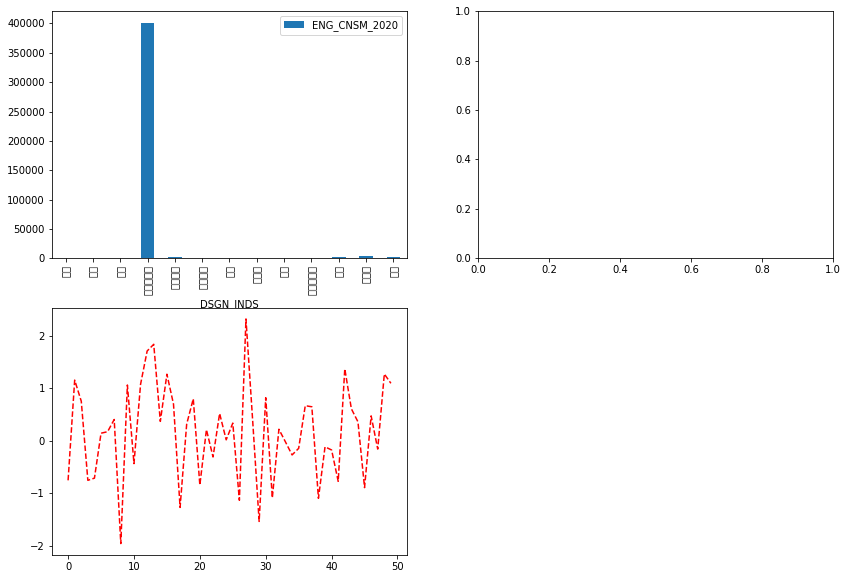

In [117]:
# your code here
fig

## ■ 문제 2-5 특정 조건에 따른 에너지소비량 그래프 만들기
df 에서 에너지소비량 1000 이하의 에너지소비량 차트를 만들기


In [118]:
# your code here
df_low_cnsm

,NO,AREA,DSGN_INDS,GHG_EMS_2016,ENG_CNSM_2016,GHG_EMS_2017,ENG_CNSM_2017,GHG_EMS_2018,ENG_CNSM_2018,GHG_EMS_2019,ENG_CNSM_2019,GHG_EMS_2020,ENG_CNSM_2020
0,1,강원도,건물,"32,321",640.7,"34,153",685,"29,185",585.7,"30,621",615.4,"23,649",472.7
1,2,강원도,광업,"188,294",514.3,"172,004",501.8,"206,624",622.5,"157,739",593.2,"35,191",628.0
3,6,강원도,시멘트,"827,522","4,487.60","1,898,766","10,045.00","1,453,305","7,944.00","1,417,415","7,742.00","95,497",576.0
4,8,강원도,제조업,"21,430",330.1,"21,467",342.7,"21,682",437.7,"19,514",394,"20,501",413.0
5,10,강원도,철강,"92,837","1,251.00","112,608","1,464.00","136,396","1,764.00","131,344","1,723.00","126,090",1671.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,287,충청북도,전기전자,"95,865","1,972.00","53,924","1,114.30","54,991","1,130.30","50,804","1,043.30","44,148",407.3
232,288,충청북도,제조업,"130,331","1,698.50","18,371",368,"18,031",361.5,"18,654",388.7,"17,975",376.3
233,289,충청북도,제지,"128,544","1,457.10","132,775","1,523.70","137,145","1,593.30","124,511","1,507.30","113,040",1426.0
234,290,충청북도,철강,"36,864",726.5,"23,828",418,"22,483",400,"20,029",382.5,"17,897",341.5


In [119]:
df_dist = pd.DataFrame(df_low_cnsm, index=df_low_cnsm.index)

C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytic

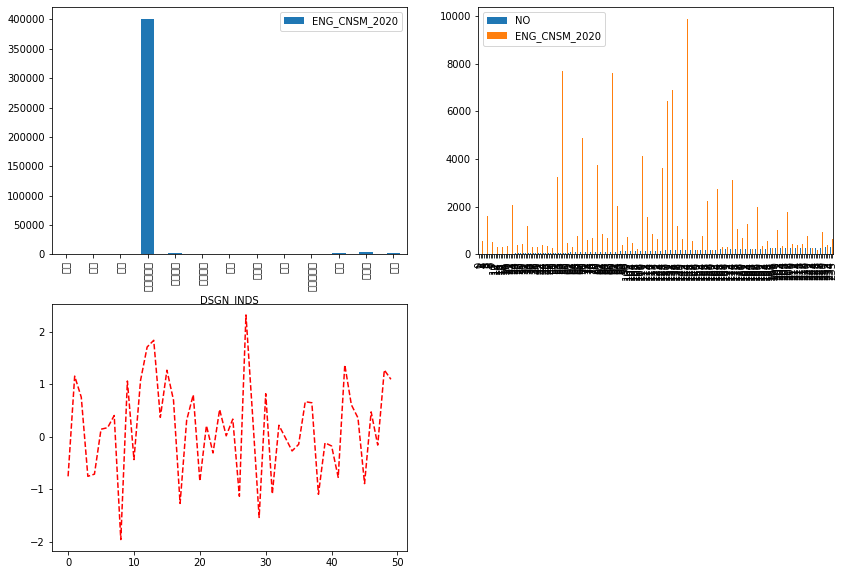

In [120]:
df_dist.plot(kind='bar', ax=ax2)
fig

그래프 차트 스타일 변경 및 스타일 적용하기.
그래프에는 여러 가지 속성이 존재한다. 그래프 유형은 막대, 선, 원그래프 등이 있고, 그래프 속성은 x축,y축 레이블, 제목, 범례(legend), x/y축의 눈금(tick), 최소 최대값 등이 있다.

iloc를 사용하여 첫번째 행과 01시-02시 데이터부터 24시-01시 데이터까지가져오자
```
df.iloc[start_row:end_row, start_col:end_col]
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
```

## ■ 문제 2-6. Column과 Rows 값을 서로 변경하시오
Transpose 메소드를 사용하여 column에 있는 데이터를 행의 값으로 변환합니다
df_busan의 transpose한 데이터프레임을 df_busan_transpose 에 할당하시오

In [121]:
df_busan = df_busan[['GHG_EMS_2016','GHG_EMS_2017','GHG_EMS_2018','GHG_EMS_2019', 'GHG_EMS_2020']]

In [122]:
df_busan[['GHG_EMS_2016','GHG_EMS_2017','GHG_EMS_2018','GHG_EMS_2019','GHG_EMS_2020']] = df_busan[['GHG_EMS_2016','GHG_EMS_2017','GHG_EMS_2018','GHG_EMS_2019','GHG_EMS_2020']].apply(lambda x: x.str.replace(',', '').astype(int))
df_busan

C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,GHG_EMS_2016,GHG_EMS_2017,GHG_EMS_2018,GHG_EMS_2019,GHG_EMS_2020
DSGN_INDS,,,,,
건물,20821,19316,18903,18686,17174
교통,60886,43234,47841,44390,41382
기계,62790,89715,7400,67578,28686
발전에너지,22355865,36512472,40399651,36670122,33284887
산업단지,193804,187627,106001,96762,129743
석유화학,21880,22213,18425,14099,17944
섬유,22746,20927,20182,22521,15876
자동차,74776,61076,55611,50061,18812
조선,17260,15992,14817,12398,10754


In [127]:
# your code here
df_busan_transpose

DSGN_INDS,건물,교통,기계,발전에너지,산업단지,석유화학,섬유,자동차,조선,집단에너지,철강,폐기물,항공
GHG_EMS_2016,20821,60886,62790,22355865,193804,21880,22746,74776,17260,58409,148910,704896,178558
GHG_EMS_2017,19316,43234,89715,36512472,187627,22213,20927,61076,15992,63680,161576,687762,194881
GHG_EMS_2018,18903,47841,7400,40399651,106001,18425,20182,55611,14817,69350,141443,657308,205972
GHG_EMS_2019,18686,44390,67578,36670122,96762,14099,22521,50061,12398,65040,150988,496091,209317
GHG_EMS_2020,17174,41382,28686,33284887,129743,17944,15876,18812,10754,31252,161177,490116,212716


## ■ 문제 2-7. 그래프의 스타일 속성을 지정하시오
df_busan_transpose 를 선 그래프 차트를 사용하여 그리시오 그래프에 대한 x축 레이블(label)은 ’연도별’로 y축 레이블은 에너지소비량, 제목(title)은 ’연도별 업종별 에너지소비량’으로 작성하시오

Text(0.5, 1.0, '시간대별 승하차 인원')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WIN\anaconda3\envs\dataAnalytics\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49849 missing from current 

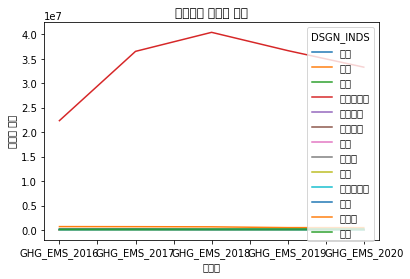

In [124]:
# your code here
ax = df_busan_transpose.plot()
# your code here

다음과 같이 이미지 파일로 내보내기가 가능하다
```
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
```

In [125]:
plt.savefig("bar_chart.png")

<Figure size 432x288 with 0 Axes>

# HW3. 데이터에 집합(Set)연산 적용하기 및 구글 드라이브와 연동하기
- 주어진 데이터셋들간에 교집합,차집합,합집합 연산을 적용해보기
- 구글 드라이브와 연동하여 파일을 쉽게 읽을 수 있도록 하기
- 구글드라이브로 공유된 파일들을 쉽게 사용하도록 하기

구글 드라이브 연동 방법
아래 코드를 실행시켜서 구글 드라이브를 마운팅 합니다. 마운팅하기 위해서는 웹브라우저를 통해 주어진 키를 복사하여 코드쉘안에 복사하여 붙여넣습니다.
구글 Colab은 기본적으로 Colab 라이브러리를 포함하고 있습니다.

In [126]:
from google.colab import drive
drive.mount('/content/gdrive/')

ModuleNotFoundError: No module named 'google'

## ■ 문제 3-1 구글 드라이브에서 기존의 csv 파일 불러오기 및 상위 10개 출력
자신의 구글드라이브에 아래 파일을 업로드한 뒤에, csv파일 데이터셋 불러오기를 수행하시오.
지역별 온실가스 및 에너지 소비량.csv

In [ ]:
path_dataset = "/content/gdrive/MyDrive/....."
filename= "지역별 온실가스 및 에너지 소비량.csv"

In [ ]:
my_df = pd.read_csv(path_dataset + filename)
my_df.head(10)

구글드라이브로 공유된 파일을 접근하기
아래 코드는 공유 파일사용하기 위한 코드이니 그대로 사용하시면 됩니다.

In [ ]:
# pyDrive 설치
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## ■ 문제 3-2. 구글드라이브 파일 공유하고 해당 파일을 읽어오기
구글 드라이브 내 URL 기반 공유를 수행하고 해당 파일을 정상적으로 다운로드되는지 확인할 구글드라이브 id를 찾아서 아래 코드에 대입하여 실행시키시기 바랍니다
예) 공유된 폴더 링크가 다음과 같다면 https://drive.google.com/drive/folders/1-EJr-anFISoVb96QYedLx5PklEtm9JSS?usp=sharing id는 1-EJr-anFISoVb96QYedLx5PklEtm9JSS 가 됩니다

In [ ]:
# 공유된 파일의 키를 아래에 대체하여 사용하시기 바랍니다
id= '.......'
file_list = drive.ListFile({'q': f"'{id}' in parents and trashed=false"}).GetList()

In [ ]:
# 공유된 파일리스트 확인하고 데이터를 다운로드 받습니다.
for file in file_list:
    downloaded = drive.CreateFile({'id': file['id']})
    downloaded.GetContentFile(file['title'])
    print(file['title'])

정상적으로 출력되었다면, 왼쪽에 폴더탭에서 정상적으로 파일이 다운로드된 것을 확인할 수있습니다.

데이터 측면에서 집합연산을 사용해 보기. 우선 2016년 에너지소비량이 50000이하인 데이터와 2020년 에너지소비량이 80000이하인 데이터를 분리한다.

In [132]:
my_df = df

In [133]:
my_df[['GHG_EMS_2016','GHG_EMS_2017','GHG_EMS_2018','GHG_EMS_2019','GHG_EMS_2020']] = my_df[['GHG_EMS_2016','GHG_EMS_2017','GHG_EMS_2018','GHG_EMS_2019','GHG_EMS_2020']].apply(lambda x: x.str.replace(',', '').astype(int))
my_df

,NO,AREA,DSGN_INDS,GHG_EMS_2016,ENG_CNSM_2016,GHG_EMS_2017,ENG_CNSM_2017,GHG_EMS_2018,ENG_CNSM_2018,GHG_EMS_2019,ENG_CNSM_2019,GHG_EMS_2020,ENG_CNSM_2020
0,1,강원도,건물,32321,640.7,34153,685,29185,585.7,30621,615.4,23649,472.7
1,2,강원도,광업,188294,514.3,172004,501.8,206624,622.5,157739,593.2,35191,628.0
2,4,강원도,발전에너지,3838862,"39,793.80",4025829,"45,554.00",4221901,"52,148.00",3614961,"44,806.00",3072716,38085.0
3,6,강원도,시멘트,827522,"4,487.60",1898766,"10,045.00",1453305,"7,944.00",1417415,"7,742.00",95497,576.0
4,8,강원도,제조업,21430,330.1,21467,342.7,21682,437.7,19514,394,20501,413.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,287,충청북도,전기전자,95865,"1,972.00",53924,"1,114.30",54991,"1,130.30",50804,"1,043.30",44148,407.3
232,288,충청북도,제조업,130331,"1,698.50",18371,368,18031,361.5,18654,388.7,17975,376.3
233,289,충청북도,제지,128544,"1,457.10",132775,"1,523.70",137145,"1,593.30",124511,"1,507.30",113040,1426.0
234,290,충청북도,철강,36864,726.5,23828,418,22483,400,20029,382.5,17897,341.5


In [134]:
P = my_df.loc[my_df['GHG_EMS_2016'] < 50000]
S = my_df.loc[my_df['GHG_EMS_2020'] < 80000]
print( P.shape[0] , S.shape[0] )

91 150


## ■ 문제 3-3. UNION 연산 수행하기
P 와 S의 UNION에 대한 집합(합집합 U)을 계산하시오 두가지 방법 이상이 기대될수 있다. 1) pd.concat을 사용하여 데이터프레임을 유지하거나, 2) 각 데이터에 대해 list 형태로 변환한 뒤에 계산하는 방법 union 연산을 수행한 결과는 152이 되어야한다
```
https://pandas.pydata.org/docs/reference/api/pandas.concat.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
https://www.w3schools.com/python/ref_set_union.asp
```

In [135]:
# your code here

152


## ■ 문제 3-4. INTERSECTION 연산 수행하기
P 와 S의 INTERSECTION 대한 집합(교집합 I)을 계산하시오
두가지 방법 이상이 기대될수 있다. 1) pd.concat을 사용하여 데이터프레임을 유지하거나, 2) 각 데이터에 대해 list 형태로 변환한 뒤에 계산하는 방법
Intersection 연산을 수행한 결과는 89이 되어야한다

```
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
https://www.w3schools.com/python/ref_set_intersection.asp
```

In [136]:
# your code here

89


## ■ 문제 3-5. DIFFERENCE 연산 수행하기
P 와 S의 DIFFERENCE 대한 값을 계산하시오
두가지 방법 이상이 기대될수 있다. 1) pd.concat을 사용하여 데이터프레임을 유지하거나, 2) 각 데이터에 대해 list 형태로 변환한 뒤에 계산하는 방법
Difference 연산을 수행한 결과는 각각 2(경기도-디스플레이, 전라북도 음식료품), 61이되어야한다

```
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html
https://www.w3schools.com/python/ref_set_difference.asp
```

In [137]:
# your code here

2 61


## ■ 문제 3-6. isSubset 함수 만들기
만약 데이터프레임 dfA, dfB가 주어질 때,
dfA가 dfB의 서브셋이고, dfA가 dfB의 서브셋이라면(동치=equivalence) return True
만약 dfA가 dfB의 서브셋이고 그 반대는 성립하지 않는 경우에도 return True
그 외(서로의 서브셋이 아닌 경우, dfB가 dfA의 서브셋이지만 그 반대는 성립하지 않는 경우)는 return False
을 반환하는 함수를 작성하여라

In [ ]:
##
def isSubset(dfA, dfB):
    # your code here
    return True

isSubset(P, I)
isSubset(P, P)
isSubset(P, S)
isSubset(P, P_only)